In [1]:
import pandas as pd

In [2]:
import yfinance as yf

In [5]:
weg = yf.download('WEGE3.SA', start = '2022-01-01')

[*********************100%%**********************]  1 of 1 completed


#**O iloc busca a posição, ja o loc busca pela data**

In [6]:
weg.iloc[1]

Open         3.222000e+01
High         3.233000e+01
Low          3.175000e+01
Close        3.186000e+01
Adj Close    3.050141e+01
Volume       4.485400e+06
Name: 2022-01-04 00:00:00, dtype: float64

In [7]:
weg.loc['2022-03-02']

Open         2.940000e+01
High         3.079000e+01
Low          2.935000e+01
Close        3.025000e+01
Adj Close    2.916080e+01
Volume       1.050380e+07
Name: 2022-03-02 00:00:00, dtype: float64

In [10]:
dados = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA'], start = '2022-01-01') ['Close']

[*********************100%%**********************]  3 of 3 completed


In [11]:
dados.head()

Ticker,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,
2022-01-03,29.090000,78.000000,32.020000
2022-01-04,29.200001,77.080002,31.860001
2022-01-05,28.070000,77.809998,30.180000
2022-01-06,28.049999,79.379997,30.170000
2022-01-07,28.180000,84.000000,29.410000


### plot: é uma função usada para plotar os dados.

 você pode especificar o tipo de gráfico desejado utilizando o parâmetro kind. Por exemplo, .plot(kind='line') para um gráfico de linhas ou .plot(kind='bar') para um gráfico de barras.

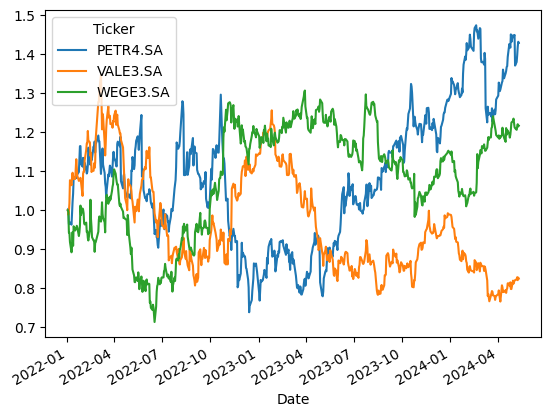

In [12]:
(dados/dados.iloc[0]).plot();

#**pct_change**
calcula uma linha para outra

In [14]:
dados.pct_change()

Ticker,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,
2022-01-03,NaN,NaN,NaN
2022-01-04,0.003781,-0.011795,-0.004997
2022-01-05,-0.038699,0.009471,-0.052731
2022-01-06,-0.000713,0.020177,-0.000331
2022-01-07,0.004635,0.058201,-0.025191
...,...,...,...
2024-05-06,0.006769,0.002969,-0.003611
2024-05-07,0.012201,0.006232,0.006989
2024-05-08,0.015252,-0.009136,0.004884


##**drop**
remove tanto linhas quanto colunas

### axis
axis=1 refere-se às colunas e axis=0 refere-se às linhas.

### inplace=True:

indica que a operação será feita no próprio DataFrame dados, ou seja, o DataFrame será modificado diretamente e não será retornado uma cópia com a coluna removida.

In [16]:
dados.drop('WEGE3.SA', axis = 1, inplace = True)

In [17]:
dados

Ticker,PETR4.SA,VALE3.SA
Date,,
2022-01-03,29.090000,78.000000
2022-01-04,29.200001,77.080002
2022-01-05,28.070000,77.809998
2022-01-06,28.049999,79.379997
2022-01-07,28.180000,84.000000
...,...,...
2024-05-06,40.160000,64.180000
2024-05-07,40.650002,64.580002
2024-05-08,41.270000,63.990002


### rolling
utilizado para calcular estatísticas de janela ao longo de uma série temporal ou ao longo de um eixo específico de um DataFrame, frequentemente utilizado em conjunto com funções de agregação, como mean(), sum(), std(), entre outras.

In [20]:
dados['MM_20_PETR4'] = dados['PETR4.SA'].rolling(20).mean()

<Axes: xlabel='Date'>

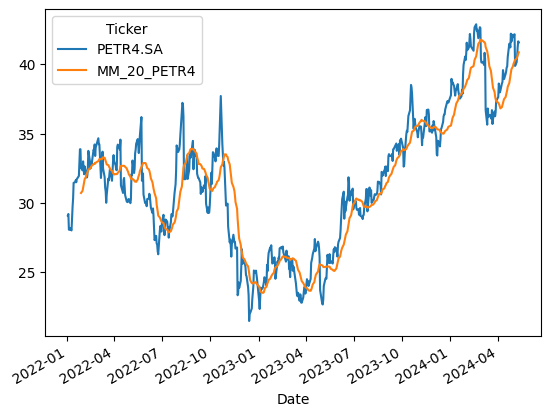

In [21]:
dados[['PETR4.SA', 'MM_20_PETR4']].plot()

### merge
usado para combinar dois ou mais DataFrames em um único DataFrame, com base em uma ou mais chaves de junção. Essa operação é semelhante a operações de junção em bancos de dados SQL.

In [23]:
sp = yf.download('^GSPC', start = '2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [24]:
sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [25]:
dados

Ticker,PETR4.SA,VALE3.SA,MM_20_PETR4
Date,,,
2022-01-03,29.090000,78.000000,NaN
2022-01-04,29.200001,77.080002,NaN
2022-01-05,28.070000,77.809998,NaN
2022-01-06,28.049999,79.379997,NaN
2022-01-07,28.180000,84.000000,NaN
...,...,...,...
2024-05-06,40.160000,64.180000,40.4285
2024-05-07,40.650002,64.580002,40.5295
2024-05-08,41.270000,63.990002,40.6565


In [27]:
pd.merge (dados, sp['Close'], how = 'inner', on = 'Date')

,PETR4.SA,VALE3.SA,MM_20_PETR4,Close
Date,,,,
2022-01-03,29.090000,78.000000,NaN,4796.560059
2022-01-04,29.200001,77.080002,NaN,4793.540039
2022-01-05,28.070000,77.809998,NaN,4700.580078
2022-01-06,28.049999,79.379997,NaN,4696.049805
2022-01-07,28.180000,84.000000,NaN,4677.029785
...,...,...,...,...
2024-05-06,40.160000,64.180000,40.4285,5180.740234
2024-05-07,40.650002,64.580002,40.5295,5187.700195
2024-05-08,41.270000,63.990002,40.6565,5187.669922


how='inner': Mantém apenas as linhas que têm uma chave correspondente em ambos os DataFrames.

on='Date': Usa a coluna 'Date' como chave para a junção, ou seja, as linhas serão mescladas com base nos valores dessa coluna em ambos os DataFrames.